In [340]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from collections import Counter

In [341]:
#read csv file
bank_df = pd.read_excel("bankdataset.xlsx", sheet_name = "Data")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [342]:
#dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [343]:
#summary of data
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [344]:
#Duplicate Check
bank_df.loc[bank_df.duplicated()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [345]:
#Null Check
bank_df.isnull().values.any()

False

<AxesSubplot: title={'center': 'Securities Account Distribution'}, xlabel='Securities Account', ylabel='count'>

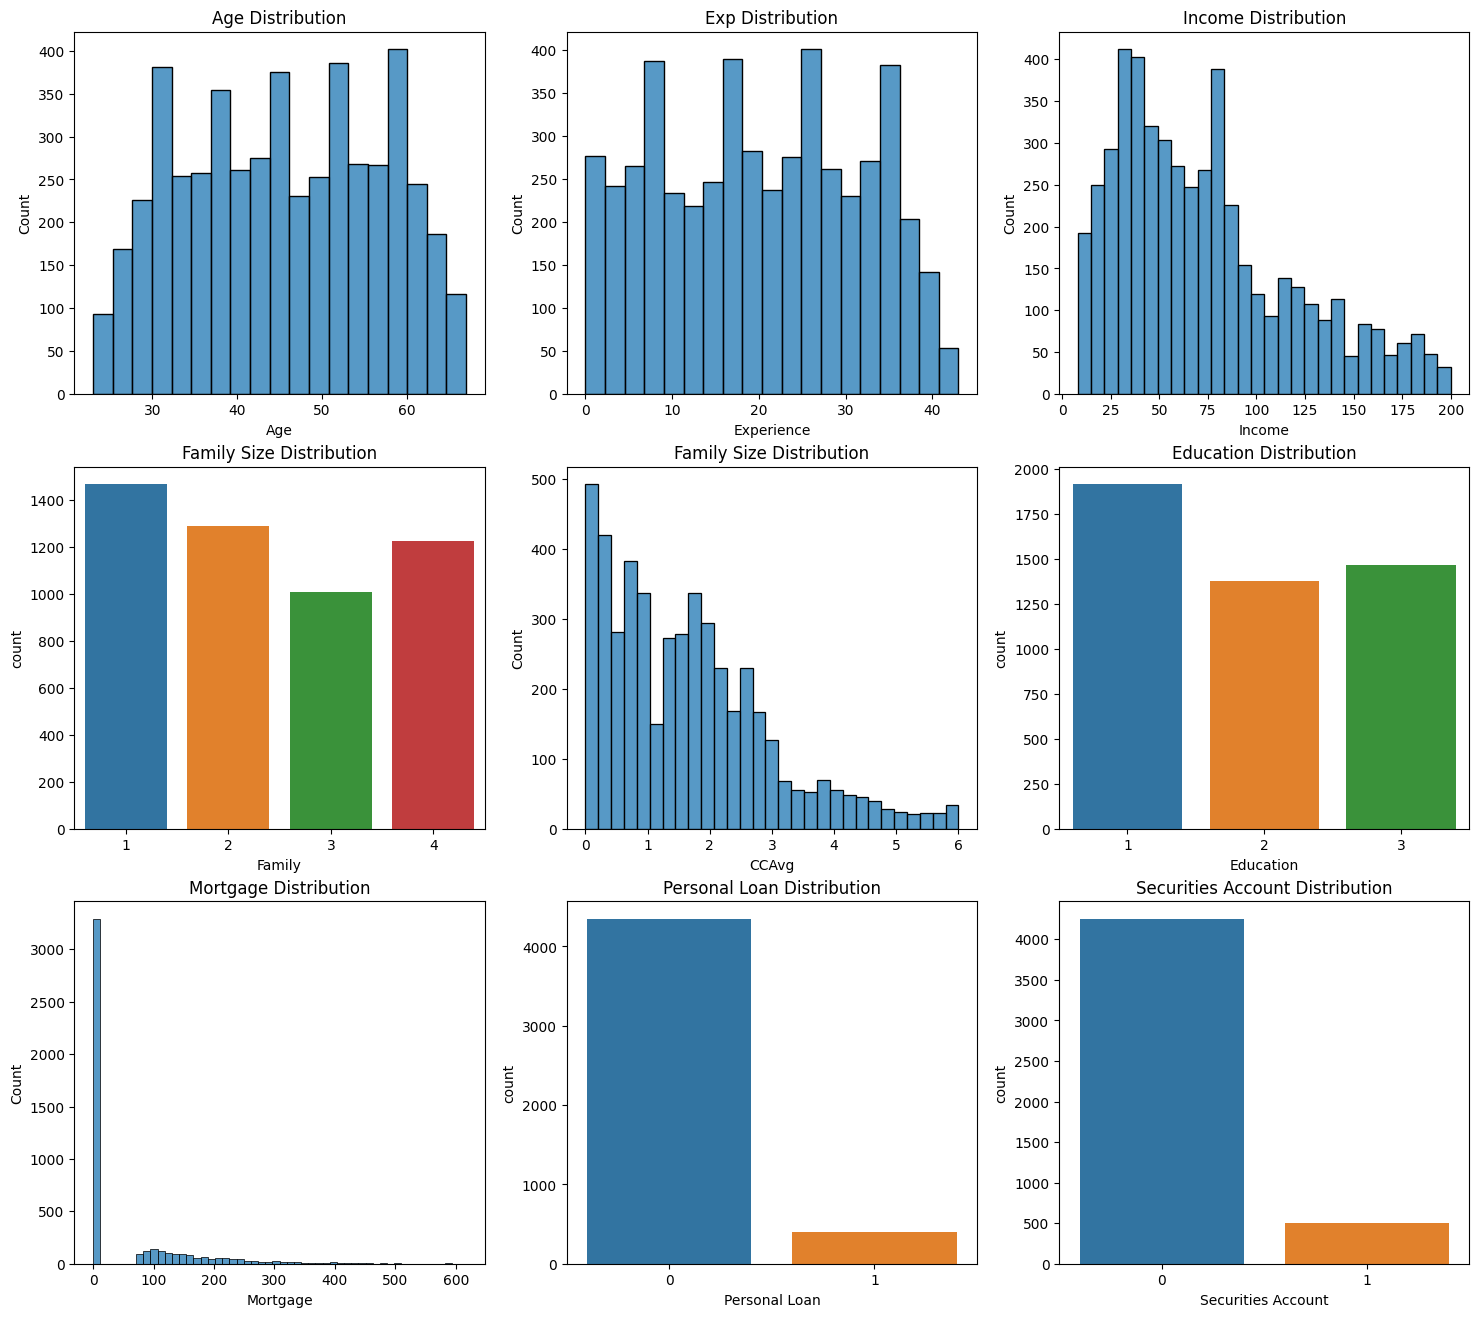

In [346]:
#EDA and DataCleaning
plt.figure(figsize=(18,16))

#age distribution
plt.subplot(3,3,1)
plt.title('Age Distribution')
sns.histplot(bank_df.Age)


#exp has negative values which will be replaced with mean values since it doesnt make sense in real world.
ages = bank_df[bank_df['Experience'] < 0]['Age'].unique().tolist()
indexes = bank_df[bank_df['Experience'] < 0].index.tolist()
for i in indexes:
    for x in ages:
        bank_df.loc[i,'Experience'] = bank_df[(bank_df.Age == x) & (bank_df.Experience > 0)].Experience.mean()

#Exp distribution
plt.subplot(3,3,2)
plt.title('Exp Distribution')
sns.histplot(bank_df.Experience)


#income has certain data ponits which are greater than 200k, since logistic regression is highyl affected by outliers, anything above 200k is removed to build a good model.
bank_df = bank_df[(bank_df['Income'] <= 200)]

#Income distribution
plt.subplot(3,3,3)
plt.title('Income Distribution')
sns.histplot(bank_df.Income)


#family Size distribution
plt.subplot(3,3,4)
plt.title('Family Size Distribution')
sns.countplot(x=bank_df["Family"])

#CC Avg has few data ponits which are greater than 6k, since logistic regression is highyl affected by outliers, anything above 6k is removed to build a good model.
bank_df = bank_df[(bank_df['CCAvg'] <= 6)]

#CC avg distribution
plt.subplot(3,3,5)
plt.title('Family Size Distribution')
sns.histplot(bank_df.CCAvg)



#Education distribution
plt.subplot(3,3,6)
plt.title('Education Distribution')
sns.countplot(x=bank_df["Education"])

#Mortgage distribution
plt.subplot(3,3,7)
plt.title('Mortgage Distribution')
sns.histplot(bank_df.Mortgage)

#personal loan balance
plt.subplot(3,3,8)
plt.title('Personal Loan Distribution')
sns.countplot(x=bank_df["Personal Loan"])

#Securities Account balance
plt.subplot(3,3,9)
plt.title('Securities Account Distribution')
sns.countplot(x=bank_df["Securities Account"])

<AxesSubplot: title={'center': 'CreditCare Usage Distribution'}, xlabel='CreditCard', ylabel='count'>

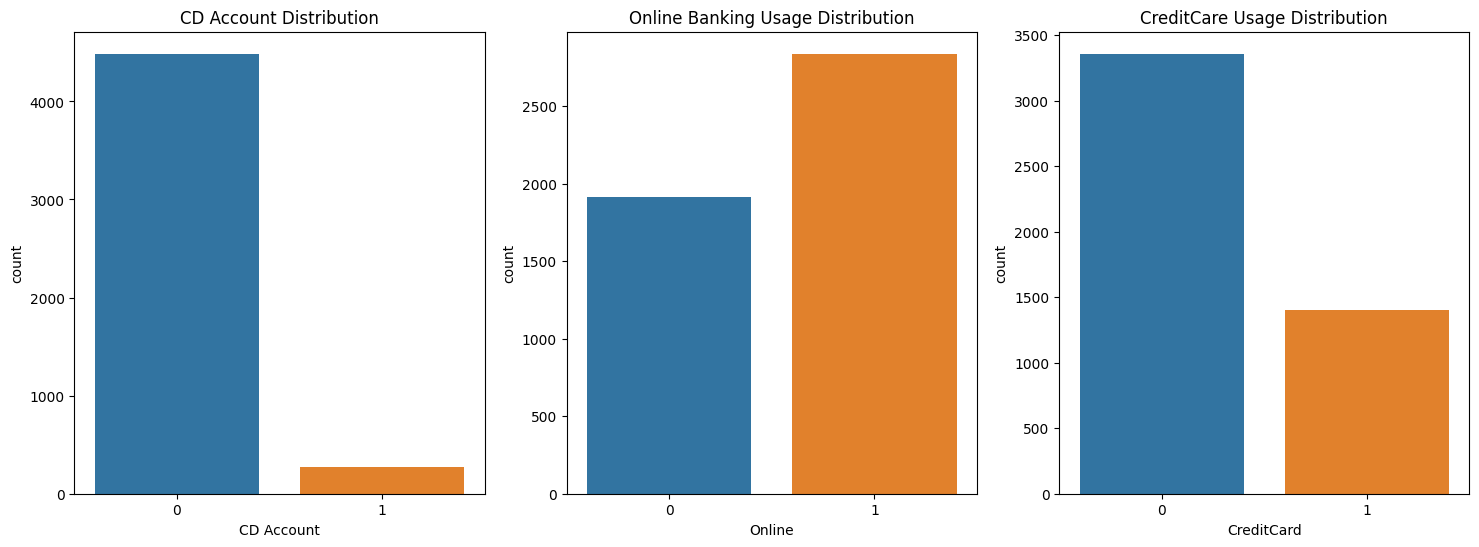

In [347]:

plt.figure(figsize=(18,6))

#CD Account
plt.subplot(1,3,1)
plt.title('CD Account Distribution')
sns.countplot(x=bank_df["CD Account"])

#online Account
plt.subplot(1,3,2)
plt.title('Online Banking Usage Distribution')
sns.countplot(x=bank_df["Online"])

#CreditCare Usage
plt.subplot(1,3,3)
plt.title('CreditCare Usage Distribution')
sns.countplot(x=bank_df["CreditCard"])

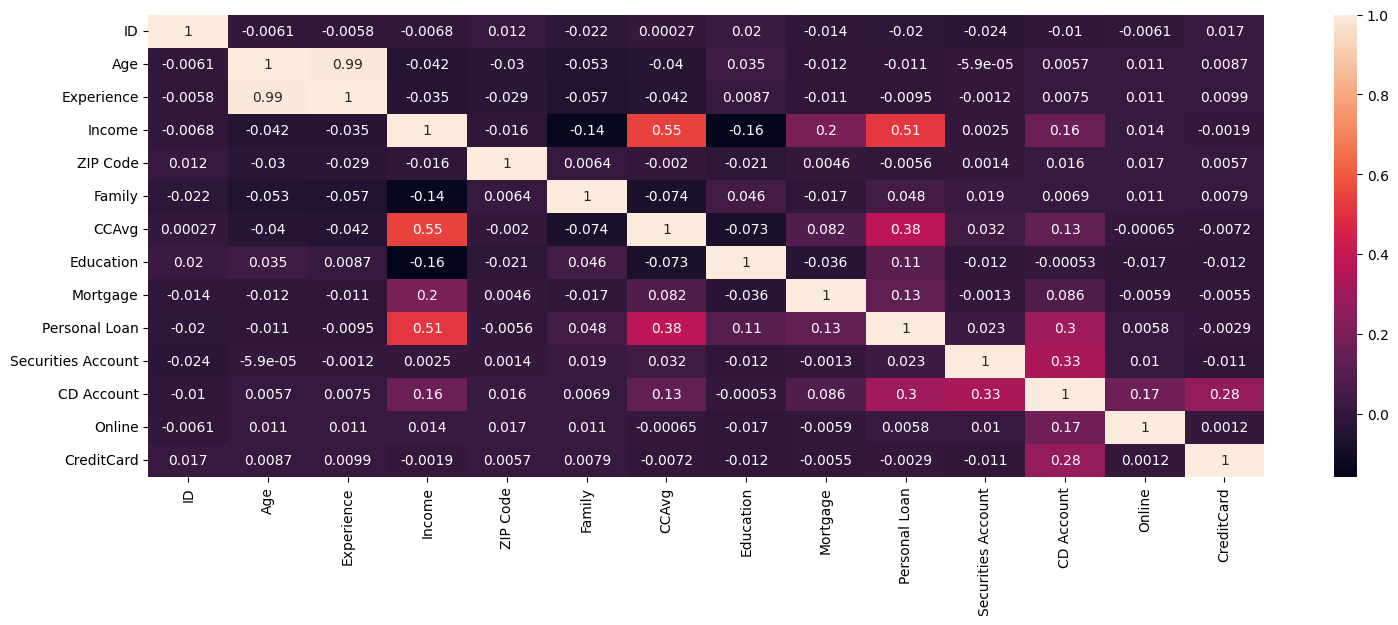

In [348]:
#correlation heat map
plt.figure(figsize=(18,6))
sns.heatmap(bank_df.corr(), annot = True);

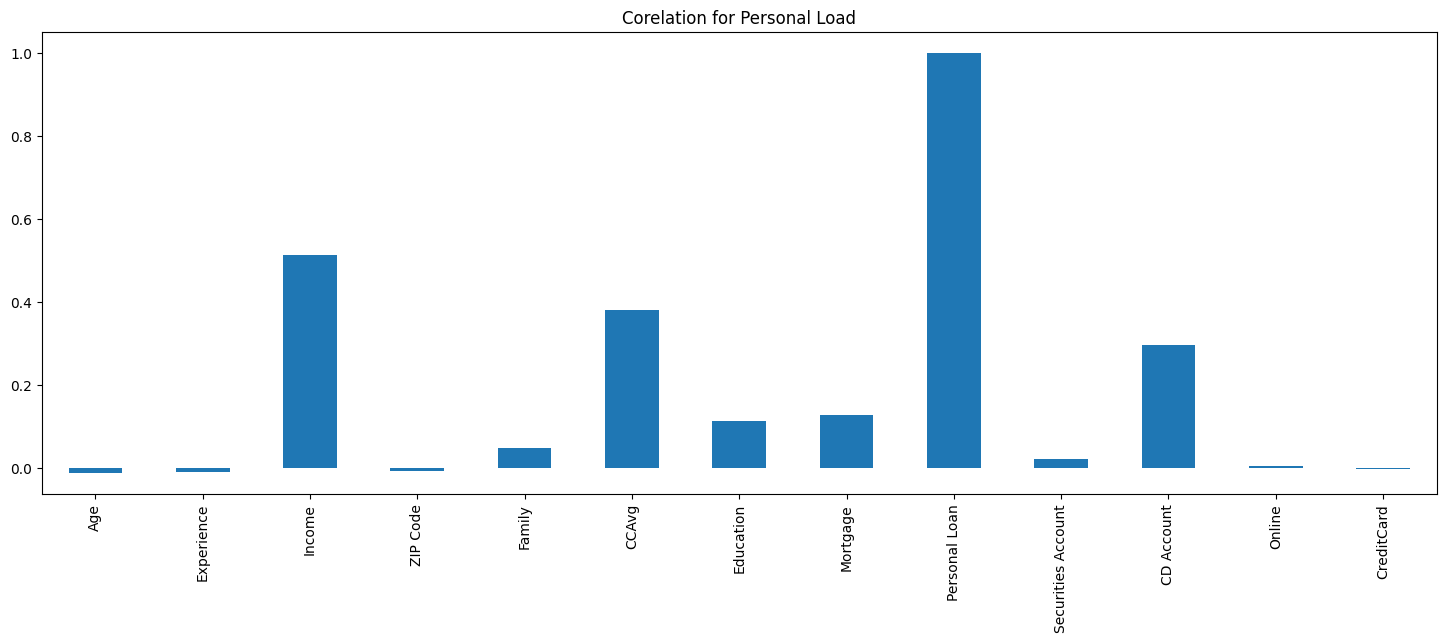

In [349]:
#checking corr of persoanl loan with the remaining features
plt.figure(figsize=(18,6))
plt.title('Corelation for Personal Load')
bank_df.corr()['Personal Loan'][1:].plot.bar();

In [350]:
#Model Build
#Scaling-standarizing numerical features
scalar = StandardScaler()
bank_df["Experience"]=scalar.fit_transform(bank_df[["Experience"]])
bank_df["Income"]=scalar.fit_transform(bank_df[["Income"]])
bank_df["CCAvg"]=scalar.fit_transform(bank_df[["CCAvg"]])
bank_df["Mortgage"]=scalar.fit_transform(bank_df[["Mortgage"]])

In [351]:
#Model Build
X = bank_df.drop(['Personal Loan'],axis=1)
Y = bank_df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [352]:
model = sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.112396
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3328
Model:                          Logit   Df Residuals:                     3315
Method:                           MLE   Df Model:                           12
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.6228
Time:                        16:34:41   Log-Likelihood:                -374.05
converged:                       True   LL-Null:                       -991.68
Covariance Type:            nonrobust   LLR p-value:                4.421e-257
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ID                 -2.848e-05   6.89e-05     -0.413      0.679      -0.000       0.000
Age  

In [353]:
y_pred = model.predict(x_test)
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]
print("Model Accuracy = ", round(accuracy_score(y_test,Y_pred),3))
rc = recall_score(y_test,Y_pred, average='binary')
print("Model Recall =  ",rc)
ps = precision_score(y_test, Y_pred,average='binary')
print("Model Precision =  ",ps)

Model Accuracy =  0.964
Model Recall =   0.6936936936936937
Model Precision =   0.8191489361702128


<AxesSubplot: >

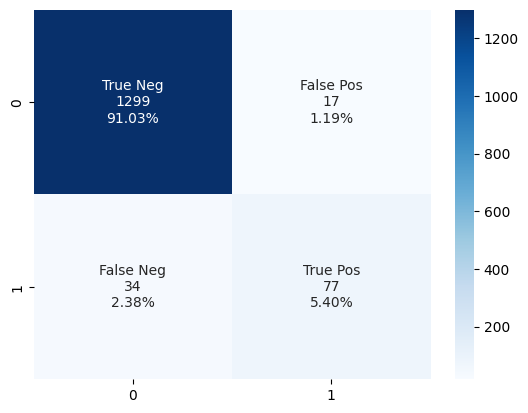

In [354]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


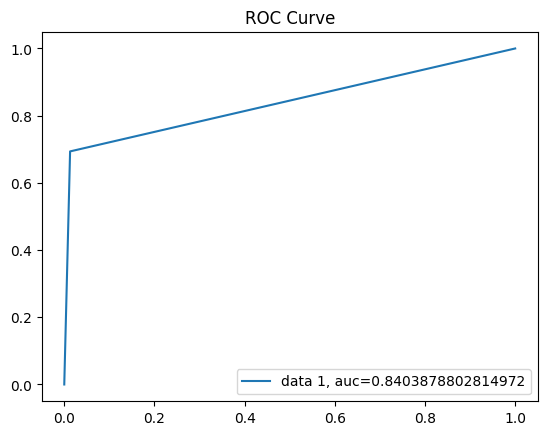

In [355]:
#ROC and AUC
auc = metrics.roc_auc_score(y_test, Y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()